In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

class cell():

    def __init__(self):
        self.ctr    = numpy.zeros(2)
        self.vSW = numpy.zeros(2)
        self.vSE = numpy.zeros(2)
        self.vNE = numpy.zeros(2)
        self.vNW = numpy.zeros(2)
        self.nN  = numpy.zeros(2)
        self.nS  = numpy.zeros(2)
        self.nE  = numpy.zeros(2)
        self.nW  = numpy.zeros(2)
        self.area = []

        self.T  = []
        self.Tn = []

def generate_mesh(nx, ny, Lx, Ly, theta, wedge):

    x = numpy.linspace(0, Lx, nx+1) # +1 porque nx es numero de celdas,
    X = numpy.zeros((ny+1,nx+1))    # no vertices
    Y = numpy.zeros((ny+1,nx+1))
    dy = Ly/ny
    dx = Lx/nx

    for j in range(ny+1):

        X[j,:] = x
        i_before = numpy.where(x<=wedge)[0]
        Y[j,i_before] = dy*j

        theta_j = theta*(Ly-j*dy)/Ly
        i_after = numpy.where(x>wedge)[0]
        Y[j,i_after] = dy*j + (dx*i_after-wedge)*numpy.tan(theta_j)

    volumes = numpy.empty((ny,nx),dtype=object)
    vol_test = numpy.zeros((ny,nx,2))
    for j in range(ny):
        for i in range(nx):
            cell_aux = cell()
            cell_aux.vSW[:] = numpy.array([X[j,i]    ,Y[j,i]    ])
            cell_aux.vSE[:] = numpy.array([X[j,i+1]  ,Y[j,i+1]  ])
            cell_aux.vNE[:] = numpy.array([X[j+1,i+1],Y[j+1,i+1]])
            cell_aux.vNW[:] = numpy.array([X[j+1,i]  ,Y[j+1,i]  ])

            cell_aux.ctr = (cell_aux.vSW + cell_aux.vSE   \
                          + cell_aux.vNE + cell_aux.vNW)/4

            cell_aux.area = compute_area(cell_aux.vSW,\
                                         cell_aux.vSE,\
                                         cell_aux.vNE,\
                                         cell_aux.vNW)

            lS = numpy.linalg.norm(cell_aux.vSE-cell_aux.vSW)
            cell_aux.nS  = numpy.array([cell_aux.vSE[1]-cell_aux.vSW[1], \
                                      -(cell_aux.vSE[0]-cell_aux.vSW[0])])/lS
            
            lE = numpy.linalg.norm(cell_aux.vSE-cell_aux.vNE)
            cell_aux.nE  = numpy.array([cell_aux.vNE[1]-cell_aux.vSE[1], \
                                      -(cell_aux.vNE[0]-cell_aux.vSE[0])])/lE

            lN = numpy.linalg.norm(cell_aux.vNW-cell_aux.vNE)
            cell_aux.nN  = numpy.array([cell_aux.vNW[1]-cell_aux.vNE[1], \
                                      -(cell_aux.vNW[0]-cell_aux.vNE[0])])/lN

            lW = numpy.linalg.norm(cell_aux.vNW-cell_aux.vSW)
            cell_aux.nW  = numpy.array([cell_aux.vSW[1]-cell_aux.vNW[1], \
                                      -(cell_aux.vSW[0]-cell_aux.vNW[0])])/lW

            volumes[j,i] = cell_aux

    return volumes

def compute_area(A, B, C, D):

    p = A - C
    q = D - B

    pq = numpy.cross(p,q)
    normpq = numpy.linalg.norm(pq)

    area = 0.5*normpq

    return area

def initial_conditions(volumes, T):

    ny, nx = numpy.shape(volumes)

    for j in range(ny):
        for i in range(nx):
            volumes[j,i].T  = T
            volumes[j,i].Tn = T

alpha = 0.1
T0 = 20.

Lx = 1.5
Ly = 1.
wedge = 0.5
theta = 15*numpy.pi/180.
nx = 30
ny = 20

mesh = generate_mesh(nx, ny, Lx, Ly, theta, wedge)

initial_conditions(mesh, T0)

Así se ven el centro de los nodos

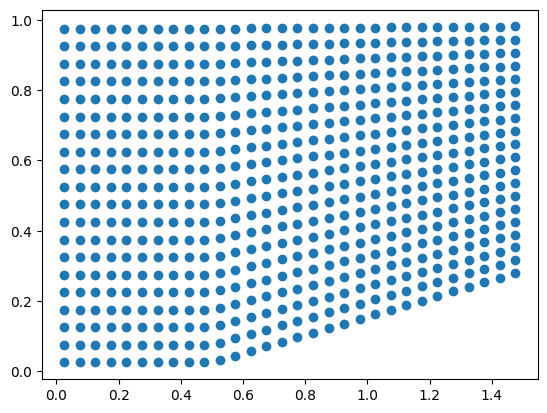

In [2]:
center = numpy.zeros((ny,nx,2))
T = numpy.zeros((ny,nx))
for j in range(ny):
    for i in range(nx):
        center[j,i,:] = mesh[j,i].ctr

pyplot.scatter(center[:,:,0],center[:,:,1])